<a href="https://colab.research.google.com/github/s1063724/2024python_analysis/blob/main/example/0119_%E8%B3%87%E6%96%99%E6%8E%A2%E7%B4%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
#探索性資料分析
#1. 資料清理: 多餘字元,取出想分析的目標資料;處理遺漏值
#2. 資料整理: 轉換成可以處理的資料格式 (csv, pandas data frame)

#處理遺漏值: 直接不要; 補值: 固定值, 平均值

import pandas as pd
df = pd.read_csv('test.csv')
print(df)

     A    B    C    D
0  0.5  0.9  0.4  NaN
1  0.8  0.6  NaN  NaN
2  0.7  0.3  0.8  0.9
3  0.8  0.3  NaN  0.2
4  0.9  NaN  0.7  0.3
5  0.2  0.7  0.6  NaN


In [175]:
#NaN, nan NumPy用來表示為 -> 空值 (null)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       5 non-null      float64
 2   C       4 non-null      float64
 3   D       3 non-null      float64
dtypes: float64(4)
memory usage: 320.0 bytes


In [176]:
#刪除 有空值(NaN) 的資料
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
df1 = df.dropna()
print(df1)

     A    B    C    D
2  0.7  0.3  0.8  0.9


In [177]:
# how = 'all'資料若全空則刪除，預設為any
df2 = df.dropna(how='all')
print(df2)

     A    B    C    D
0  0.5  0.9  0.4  NaN
1  0.8  0.6  NaN  NaN
2  0.7  0.3  0.8  0.9
3  0.8  0.3  NaN  0.2
4  0.9  NaN  0.7  0.3
5  0.2  0.7  0.6  NaN


In [178]:
# subset(子集合)=['B','C']刪除B、C有空值的欄位
df3 = df.dropna(subset=['B', 'C'])
print(df3)

     A    B    C    D
0  0.5  0.9  0.4  NaN
2  0.7  0.3  0.8  0.9
5  0.2  0.7  0.6  NaN


In [179]:
# 行或列的非缺失值(有值的數量)<thresh數量則會被刪除
# axis預設為0，刪除缺失值的列(row)
df4 = df.dropna(thresh=3, axis =0)
df4

,A,B,C,D
0,0.5,0.9,0.4,NaN
2,0.7,0.3,0.8,0.9
3,0.8,0.3,NaN,0.2
4,0.9,NaN,0.7,0.3
5,0.2,0.7,0.6,NaN


In [180]:
# 補值(填充)
df1 = df.fillna(value=1)
print(df1)

     A    B    C    D
0  0.5  0.9  0.4  1.0
1  0.8  0.6  1.0  1.0
2  0.7  0.3  0.8  0.9
3  0.8  0.3  1.0  0.2
4  0.9  1.0  0.7  0.3
5  0.2  0.7  0.6  1.0


In [181]:
df['B'] = df['B'].fillna(df['B'].mean()) #.mean()  .median()
#練習將 C 與 D 欄位用平均值取代 NaN 值
df['C'] = df['C'].fillna(df['C'].mean())
df['D'] = df['D'].fillna(df['D'].mean())
print(df)

     A     B      C         D
0  0.5  0.90  0.400  0.466667
1  0.8  0.60  0.625  0.466667
2  0.7  0.30  0.800  0.900000
3  0.8  0.30  0.625  0.200000
4  0.9  0.56  0.700  0.300000
5  0.2  0.70  0.600  0.466667


In [182]:
#重複資料
df = pd.read_csv('test2.csv')
print(df)

     A    B    C    D
0  0.7  0.3  0.8  0.9
1  0.8  0.6  0.4  0.8
2  0.7  0.3  0.8  0.9
3  0.8  0.3  0.5  0.2
4  0.9  0.3  0.7  0.3
5  0.7  0.3  0.8  0.9


In [183]:
# 查看重複值的資料
for column in df.columns:
  print(column , '\n', df.duplicated(column), '\n---------------------')


A 
 0    False
1    False
2     True
3     True
4    False
5     True
dtype: bool 
---------------------
B 
 0    False
1    False
2     True
3     True
4     True
5     True
dtype: bool 
---------------------
C 
 0    False
1    False
2     True
3    False
4    False
5     True
dtype: bool 
---------------------
D 
 0    False
1    False
2     True
3    False
4    False
5     True
dtype: bool 
---------------------


In [184]:
# 刪除重複資料(row2 == row5，所以會被刪除)
df1 = df.drop_duplicates()
print(df1)

     A    B    C    D
0  0.7  0.3  0.8  0.9
1  0.8  0.6  0.4  0.8
3  0.8  0.3  0.5  0.2
4  0.9  0.3  0.7  0.3


In [185]:
#分類類型的資料: 性別, 季節 -> 分類的編碼
from sklearn import preprocessing
df = pd.read_csv('test3.csv')
print(df)
print('-------------------------------')
# 只有'價格'是數字，其他欄位都是分類類型的資料(文字類型)，所以要做編碼轉譯
le = preprocessing.LabelEncoder()
df['性別'] = le.fit_transform(df['性別'])
df['尺寸'] = le.fit_transform(df['尺寸'])
print(df)

              性別   尺寸   價格
0           male   XL  800
1         female    M  400
2  not specified  XXL  300
3           male    L  500
4         female    S  700
5         female   XS  850
-------------------------------
   性別  尺寸   價格
0   1   3  800
1   0   1  400
2   2   5  300
3   1   0  500
4   0   2  700
5   0   4  850


In [186]:
titanic = pd.read_csv('titanic_data.csv')
# (資料數量, 欄位)
print(titanic.shape)

(1313, 6)


In [187]:
print(titanic.head())

   PassengerId                                           Name PClass    Age  \
0            1                   Allen, Miss Elisabeth Walton    1st  29.00   
1            2                    Allison, Miss Helen Loraine    1st   2.00   
2            3            Allison, Mr Hudson Joshua Creighton    1st  30.00   
3            4  Allison, Mrs Hudson JC (Bessie Waldo Daniels)    1st  25.00   
4            5                  Allison, Master Hudson Trevor    1st   0.92   

      Sex  Survived  
0  female         1  
1  female         0  
2    male         0  
3  female         0  
4    male         1  


In [188]:
print(titanic.describe()) #描述統計

print(titanic.info())

       PassengerId         Age     Survived
count  1313.000000  756.000000  1313.000000
mean    657.000000   30.397989     0.342727
std     379.174762   14.259049     0.474802
min       1.000000    0.170000     0.000000
25%     329.000000   21.000000     0.000000
50%     657.000000   28.000000     0.000000
75%     985.000000   39.000000     1.000000
max    1313.000000   71.000000     1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1313 non-null   int64  
 1   Name         1313 non-null   object 
 2   PClass       1313 non-null   object 
 3   Age          756 non-null    float64
 4   Sex          1313 non-null   object 
 5   Survived     1313 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 61.7+ KB
None


In [189]:
import numpy as np
# 確認編號是否為唯一值
print(np.unique(titanic['PassengerId'].values))
# 印出大小
print(np.unique(titanic['PassengerId'].values).size)
# 設定索引值(inplace是直接取代的意思)
titanic.set_index(['PassengerId'], inplace=True)
print(titanic.head())
#將 PassengerId 設定成資料的索引欄位, 設定前有做唯一值檢查

[   1    2    3 ... 1311 1312 1313]
1313
                                                      Name PClass    Age  \
PassengerId                                                                
1                             Allen, Miss Elisabeth Walton    1st  29.00   
2                              Allison, Miss Helen Loraine    1st   2.00   
3                      Allison, Mr Hudson Joshua Creighton    1st  30.00   
4            Allison, Mrs Hudson JC (Bessie Waldo Daniels)    1st  25.00   
5                            Allison, Master Hudson Trevor    1st   0.92   

                Sex  Survived  
PassengerId                    
1            female         1  
2            female         0  
3              male         0  
4            female         0  
5              male         1  


In [190]:
test = np.where(titanic['Sex']=='female')
print(test)
print(type(test))

(array([   0,    1,    3,    6,    8,   11,   12,   15,   19,   23,   27,
         28,   30,   31,   36,   37,   38,   41,   42,   48,   49,   52,
         54,   56,   58,   59,   61,   64,   67,   69,   70,   73,   74,
         76,   80,   81,   83,   85,   87,   89,   91,   93,   94,   95,
         96,   99,  101,  102,  104,  107,  109,  111,  113,  115,  116,
        118,  122,  123,  124,  128,  130,  132,  135,  136,  140,  141,
        142,  144,  147,  149,  155,  157,  159,  162,  163,  164,  167,
        169,  173,  178,  180,  182,  188,  189,  190,  194,  200,  202,
        205,  208,  212,  214,  216,  219,  220,  222,  225,  227,  230,
        236,  239,  241,  244,  248,  249,  251,  253,  255,  257,  258,
        260,  262,  265,  271,  273,  277,  278,  280,  282,  288,  289,
        290,  291,  292,  293,  294,  295,  296,  297,  298,  300,  301,
        303,  308,  310,  311,  313,  314,  315,  318,  319,  320,  321,
        323,  327,  331,  335,  337,  338,  340,  

In [191]:
# 創建一個新的欄位，將性別欄位做編碼(也可以用labelencoder)
titanic['SexCode'] = np.where(titanic['Sex']=='female', 1, 0)
print(titanic.head())

                                                      Name PClass    Age  \
PassengerId                                                                
1                             Allen, Miss Elisabeth Walton    1st  29.00   
2                              Allison, Miss Helen Loraine    1st   2.00   
3                      Allison, Mr Hudson Joshua Creighton    1st  30.00   
4            Allison, Mrs Hudson JC (Bessie Waldo Daniels)    1st  25.00   
5                            Allison, Master Hudson Trevor    1st   0.92   

                Sex  Survived  SexCode  
PassengerId                             
1            female         1        1  
2            female         0        1  
3              male         0        0  
4            female         0        1  
5              male         1        0  


In [192]:
# 建立艙等對造表(PClass)
class_mapping = {
            '1st':1,
            '2nd':2,
            '3rd':3
}

titanic['PClass'] = titanic['PClass'].map(class_mapping)
print(titanic.head())

                                                      Name  PClass    Age  \
PassengerId                                                                 
1                             Allen, Miss Elisabeth Walton     1.0  29.00   
2                              Allison, Miss Helen Loraine     1.0   2.00   
3                      Allison, Mr Hudson Joshua Creighton     1.0  30.00   
4            Allison, Mrs Hudson JC (Bessie Waldo Daniels)     1.0  25.00   
5                            Allison, Master Hudson Trevor     1.0   0.92   

                Sex  Survived  SexCode  
PassengerId                             
1            female         1        1  
2            female         0        1  
3              male         0        0  
4            female         0        1  
5              male         1        0  


In [193]:
print(titanic.isnull().sum())

Name          0
PClass        1
Age         557
Sex           0
Survived      0
SexCode       0
dtype: int64


In [194]:
print(sum(titanic['Age'].isnull()))

557


In [195]:
#補充 Age 欄位的缺漏值
avg_age = titanic['Age'].mean()
# inplace取代
titanic['Age'].fillna(avg_age, inplace=True)
print(titanic.isnull().sum())

Name        0
PClass      1
Age         0
Sex         0
Survived    0
SexCode     0
dtype: int64


In [196]:
print(titanic)

                                                      Name  PClass    Age  \
PassengerId                                                                 
1                             Allen, Miss Elisabeth Walton     1.0  29.00   
2                              Allison, Miss Helen Loraine     1.0   2.00   
3                      Allison, Mr Hudson Joshua Creighton     1.0  30.00   
4            Allison, Mrs Hudson JC (Bessie Waldo Daniels)     1.0  25.00   
5                            Allison, Master Hudson Trevor     1.0   0.92   
...                                                    ...     ...    ...   
1309                                    Zakarian, Mr Artun     3.0  27.00   
1310                                Zakarian, Mr Maprieder     3.0  26.00   
1311                                      Zenni, Mr Philip     3.0  22.00   
1312                                      Lievens, Mr Rene     3.0  24.00   
1313                                        Zimmerman, Leo     3.0  29.00   

In [197]:
print(sum(titanic['Survived']==0))

863


In [198]:
#開始探索分析資料
# 死亡為0、存活為1
titanic['Died'] = np.where(titanic['Survived'] == 0, 0, 1)
print(titanic)

                                                      Name  PClass    Age  \
PassengerId                                                                 
1                             Allen, Miss Elisabeth Walton     1.0  29.00   
2                              Allison, Miss Helen Loraine     1.0   2.00   
3                      Allison, Mr Hudson Joshua Creighton     1.0  30.00   
4            Allison, Mrs Hudson JC (Bessie Waldo Daniels)     1.0  25.00   
5                            Allison, Master Hudson Trevor     1.0   0.92   
...                                                    ...     ...    ...   
1309                                    Zakarian, Mr Artun     3.0  27.00   
1310                                Zakarian, Mr Maprieder     3.0  26.00   
1311                                      Zenni, Mr Philip     3.0  22.00   
1312                                      Lievens, Mr Rene     3.0  24.00   
1313                                        Zimmerman, Leo     3.0  29.00   

<Axes: ylabel='Frequency'>

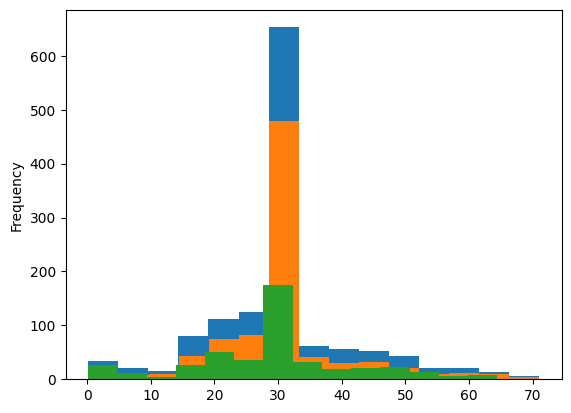

In [199]:
# hist長條圖bins粗細度
titanic['Age'].plot(kind='hist', bins=15)
# 死亡人數
df = titanic[titanic.Survived == 0]
df['Age'].plot(kind='hist', bins=15)
# 存活人數
df = titanic[titanic.Survived == 1]
df['Age'].plot(kind='hist', bins=15)

In [200]:
# url = 'https://data.gov.tw/dataset/40448'
# 將sitename設為索引(index_col)
df = pd.read_csv('aqx.csv', usecols=['sitename', 'aqi', 'co', 'o3', 'pm10', 'pm2.5', 'no2', 'no'],
                 index_col='sitename')
print(df)

          aqi    co    o3  pm10  pm2.5   no2   no
sitename                                         
基隆         75  0.36  61.8    44     31   9.8  1.0
汐止         54  0.26  51.9    29     20  10.1  1.3
萬里         71  0.34  65.3    66     31   6.7  1.3
新店         56  0.39  62.4    42     25  11.8  0.6
土城         54  0.32  59.0    34     17   7.9  1.1
...       ...   ...   ...   ...    ...   ...  ...
臺南(麻豆)     74  0.24  57.1    44     20   8.8  0.5
屏東(琉球)     65  0.21  63.2    23     15   4.9  0.6
屏東縣（泰武）    77  0.37  76.6    41     24   5.9  0.3
新北(樹林)     54  0.30  39.9    33     22   9.9  0.9
屏東(枋山)     77  0.17  53.6    29     15   3.6  0.4

[85 rows x 7 columns]


In [201]:
df.head(20)

,aqi,co,o3,pm10,pm2.5,no2,no
sitename,,,,,,,
基隆,75,0.36,61.8,44,31,9.8,1.0
汐止,54,0.26,51.9,29,20,10.1,1.3
萬里,71,0.34,65.3,66,31,6.7,1.3
新店,56,0.39,62.4,42,25,11.8,0.6
土城,54,0.32,59.0,34,17,7.9,1.1
板橋,52,0.38,55.5,28,15,9.0,1.1
新莊,59,0.24,54.3,27,20,6.1,1.3
菜寮,71,0.40,60.7,47,31,10.9,1.1
林口,61,0.32,58.5,44,21,7.2,1.3


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 基隆 to 屏東(枋山)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   aqi     85 non-null     int64  
 1   co      85 non-null     float64
 2   o3      84 non-null     float64
 3   pm10    85 non-null     int64  
 4   pm2.5   85 non-null     int64  
 5   no2     83 non-null     float64
 6   no      83 non-null     float64
dtypes: float64(4), int64(3)
memory usage: 5.3+ KB


In [203]:
df1 = df.dropna(how='any')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 基隆 to 屏東(枋山)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   aqi     82 non-null     int64  
 1   co      82 non-null     float64
 2   o3      82 non-null     float64
 3   pm10    82 non-null     int64  
 4   pm2.5   82 non-null     int64  
 5   no2     82 non-null     float64
 6   no      82 non-null     float64
dtypes: float64(4), int64(3)
memory usage: 5.1+ KB


In [204]:
df1.describe()

,aqi,co,o3,pm10,pm2.5,no2,no
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,64.487805,0.297561,57.670732,36.048780,20.170732,7.585366,1.218293
std,13.842361,0.100977,6.307520,9.646726,6.151994,4.651752,1.295875
min,38.000000,0.130000,39.900000,20.000000,9.000000,1.600000,0.000000
25%,54.000000,0.240000,53.650000,29.000000,15.000000,4.700000,0.600000
50%,64.000000,0.270000,58.450000,33.000000,18.500000,6.350000,1.000000
75%,74.750000,0.327500,61.800000,42.000000,24.000000,9.075000,1.300000
max,113.000000,0.820000,76.600000,66.000000,34.000000,24.800000,8.200000


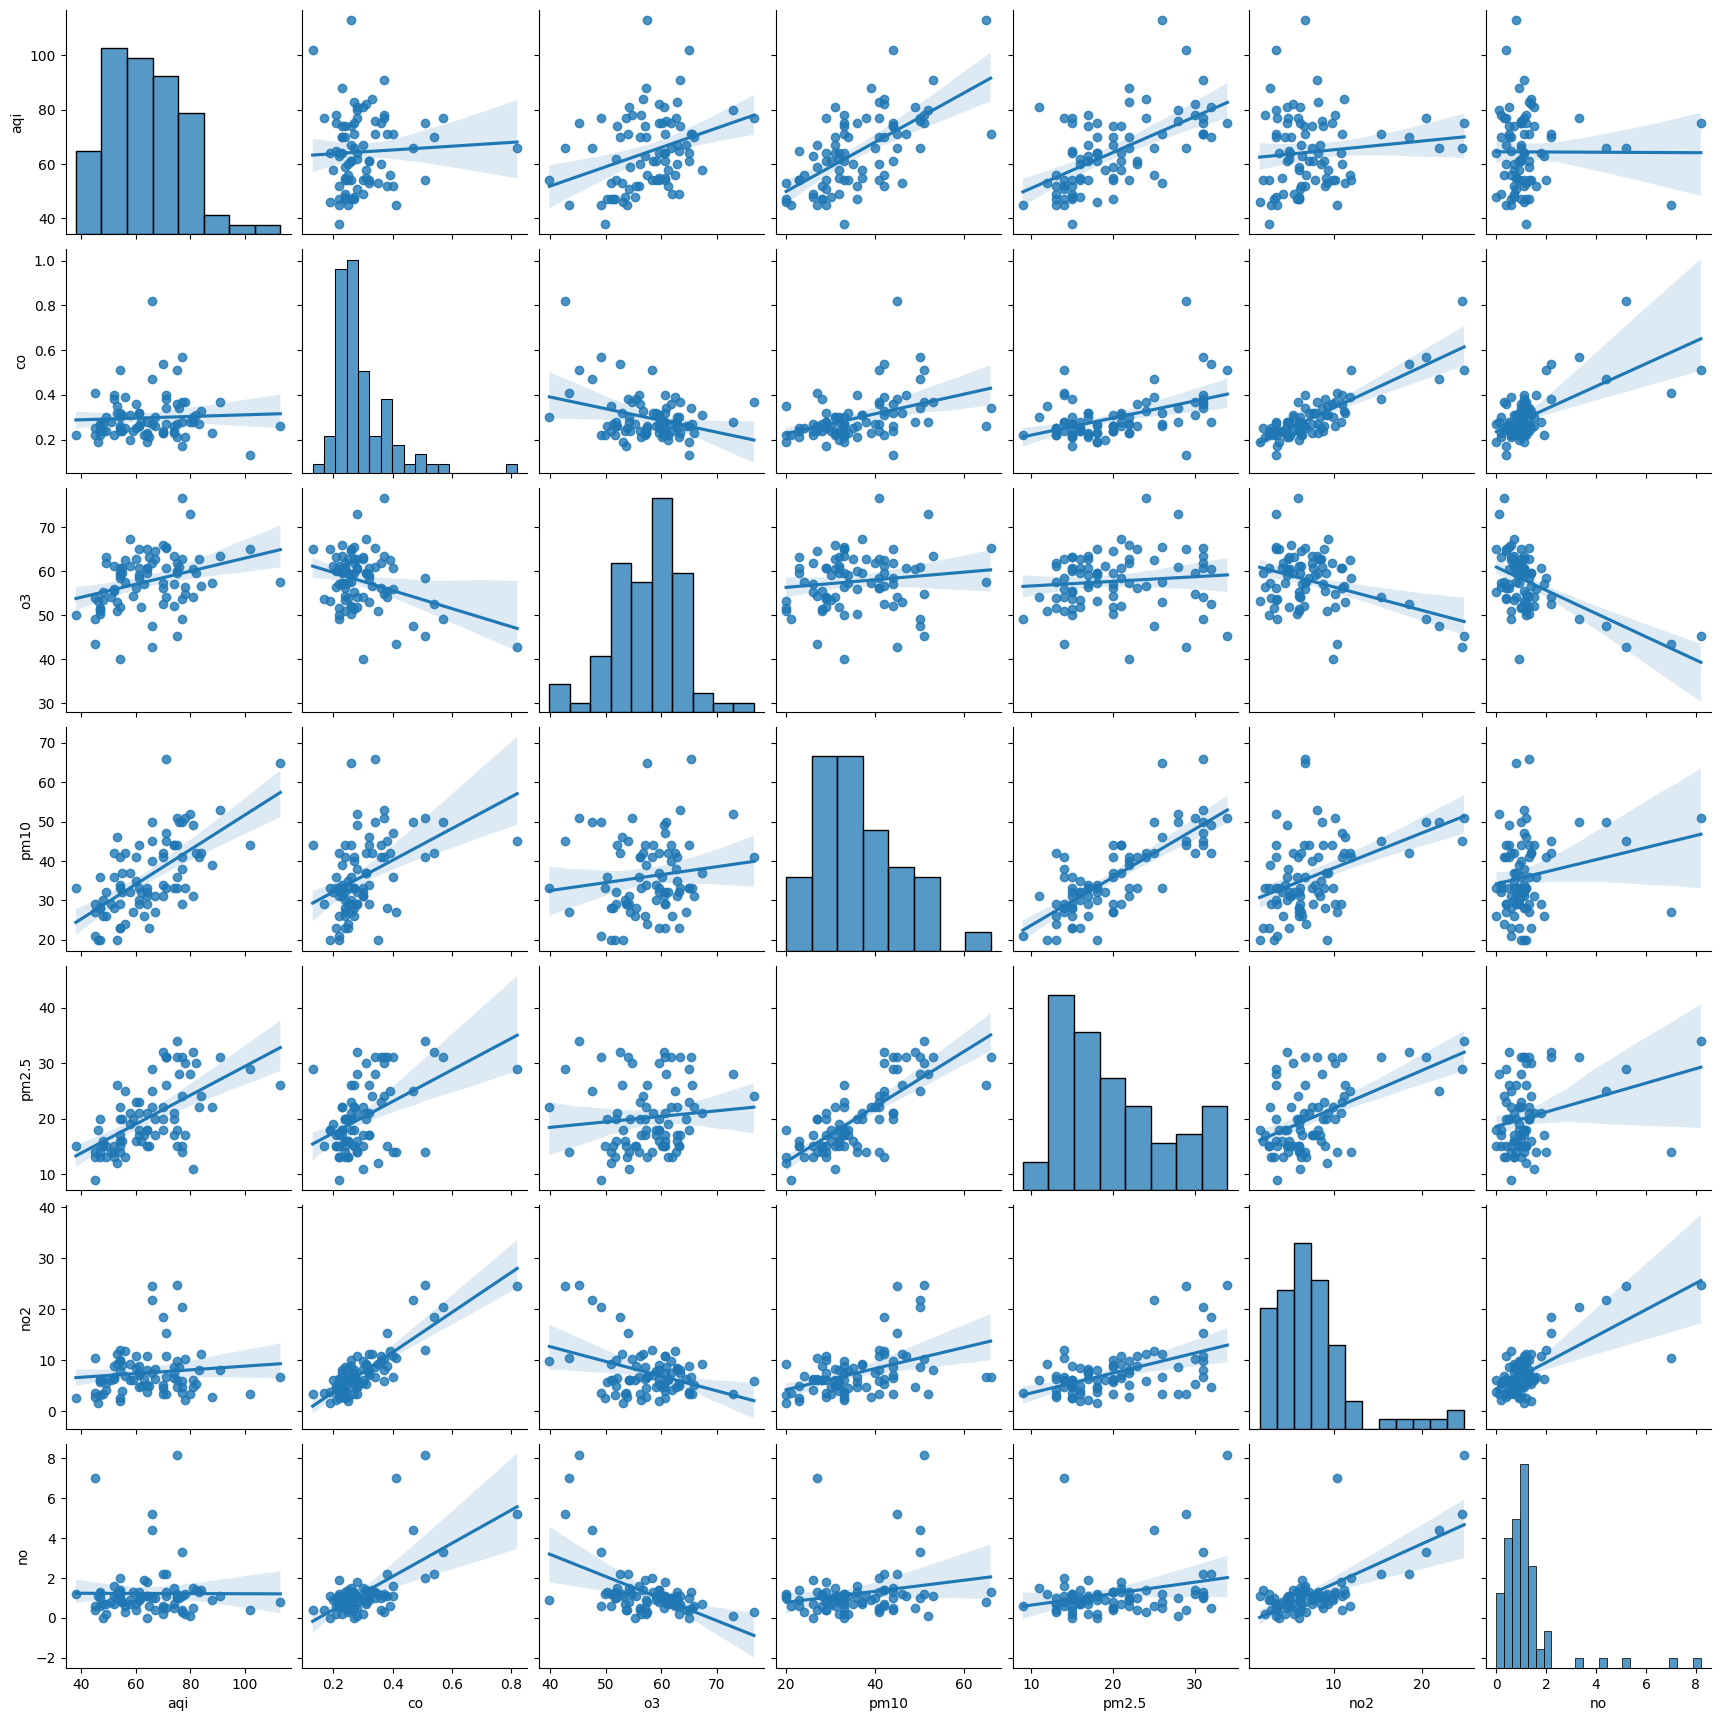

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

# pairplot配對圖
sns.pairplot(df1, kind='reg') #regression 回歸線(越聚集越相關性越大)
plt.show()


In [206]:
# 相關係數
print(df1.corr())

            aqi        co        o3      pm10     pm2.5       no2        no
aqi    1.000000  0.050765  0.325242  0.631372  0.585138  0.107998 -0.004014
co     0.050765  1.000000 -0.328780  0.421531  0.465918  0.848363  0.649640
o3     0.325242 -0.328780  1.000000  0.132435  0.102099 -0.392021 -0.542033
pm10   0.631372  0.421531  0.132435  1.000000  0.779126  0.428815  0.206529
pm2.5  0.585138  0.465918  0.102099  0.779126  1.000000  0.517167  0.273858
no2    0.107998  0.848363 -0.392021  0.428815  0.517167  1.000000  0.720008
no    -0.004014  0.649640 -0.542033  0.206529  0.273858  0.720008  1.000000
